In [1]:

import findspark
findspark.init()
findspark.find()
import os
import sys
os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

In [2]:
import requests
import pandas as pd
import matplotlib.pylab as plt
import pyspark
from pyspark import SparkConf,SparkContext
from pyspark.sql import SparkSession

from pyspark import SQLContext
import json
import datetime
import datetime
from pyspark.sql.functions import year, month, dayofmonth, expr,col
from pyspark.sql.types import DateType, IntegerType

In [3]:

from pyspark import SparkContext
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

In [4]:
#url = "https://raw.githubusercontent.com/platformps/LoanDataset/main/loan_data.json"

apidata = requests.get("https://raw.githubusercontent.com/platformps/LoanDataset/main/loan_data.json")

print('HTTP Status Code: ' + str(apidata.status_code))
apidata1=apidata.json()
   

HTTP Status Code: 200


In [5]:
with open('jsondata.json', 'w') as json_file:
    json.dump(apidata1, json_file)

In [7]:

df_loan = spark.read.format('org.apache.spark.sql.json').load("jsondata.json")
df_loan.show()

+--------------+------------------+--------------+----------+------------+------+------+-------+-------------+-------------+
|Application_ID|Application_Status|Credit_History|Dependents|   Education|Gender|Income|Married|Property_Area|Self_Employed|
+--------------+------------------+--------------+----------+------------+------+------+-------+-------------+-------------+
|      LP001002|                 Y|             1|         0|    Graduate|  Male|medium|     No|        Urban|           No|
|      LP001003|                 N|             1|         1|    Graduate|  Male|medium|    Yes|        Rural|           No|
|      LP001005|                 Y|             1|         0|    Graduate|  Male|   low|    Yes|        Urban|          Yes|
|      LP001006|                 Y|             1|         0|Not Graduate|  Male|   low|    Yes|        Urban|           No|
|      LP001008|                 Y|             1|         0|    Graduate|  Male|medium|     No|        Urban|           No|


In [6]:

df_loan.printSchema()
df_loan.columns

root
 |-- Application_ID: string (nullable = true)
 |-- Application_Status: string (nullable = true)
 |-- Credit_History: long (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Income: string (nullable = true)
 |-- Married: string (nullable = true)
 |-- Property_Area: string (nullable = true)
 |-- Self_Employed: string (nullable = true)



['Application_ID',
 'Application_Status',
 'Credit_History',
 'Dependents',
 'Education',
 'Gender',
 'Income',
 'Married',
 'Property_Area',
 'Self_Employed']

In [11]:
df_loan.write.format("jdbc")\
.mode("append")\
.option("driver","com.mysql.cj.jdbc.Driver")\
.option("user","")\
.option("url","jdbc:mysql://localhost:3306/creditcard_capstone")\
.option("dbtable","creditcard_capstone.CDW_SAPP_loan_application")\
.option("password","")\
.save()

In [8]:
data_loan1=df_loan['Application_ID', 'Application_Status','Credit_History','Dependents','Education','Gender','Income','Married',\
      'Property_Area','Self_Employed'].toPandas()
data_loan1.head()

,Application_ID,Application_Status,Credit_History,Dependents,Education,Gender,Income,Married,Property_Area,Self_Employed
0,LP001002,Y,1,0,Graduate,Male,medium,No,Urban,No
1,LP001003,N,1,1,Graduate,Male,medium,Yes,Rural,No
2,LP001005,Y,1,0,Graduate,Male,low,Yes,Urban,Yes
3,LP001006,Y,1,0,Not Graduate,Male,low,Yes,Urban,No
4,LP001008,Y,1,0,Graduate,Male,medium,No,Urban,No


In [34]:
data_loan1.isnull().sum()

Application_ID        0
Application_Status    0
Credit_History        0
Dependents            0
Education             0
Gender                0
Income                0
Married               0
Property_Area         0
Self_Employed         0
dtype: int64

In [27]:
import matplotlib.pyplot as plt
import seaborn as sb

In [8]:
import mysql.connector
import mysql.connector as mariadb

def get_db_connection():
    con = mariadb.connect(host='localhost', port= 3307,user="root",password="2011",database="creditcard_capstone")
    return con

In [40]:
sql_query = "select * from cdw_sapp_loan_application"
db_con = get_db_connection()
cursor = db_con.cursor()  
cursor.execute(sql_query,)
dataset_full = pd.DataFrame(cursor.fetchall(), columns = ['Application_ID','Application_Status','Credit_History','Dependents','Education','Gender','Income','Married','Property_Area','Self_Employed'])
dataset_full.head()

,Application_ID,Application_Status,Credit_History,Dependents,Education,Gender,Income,Married,Property_Area,Self_Employed
0,LP001002,Y,1,0,Graduate,Male,medium,No,Urban,No
1,LP001003,N,1,1,Graduate,Male,medium,Yes,Rural,No
2,LP001005,Y,1,0,Graduate,Male,low,Yes,Urban,Yes
3,LP001006,Y,1,0,Not Graduate,Male,low,Yes,Urban,No
4,LP001008,Y,1,0,Graduate,Male,medium,No,Urban,No


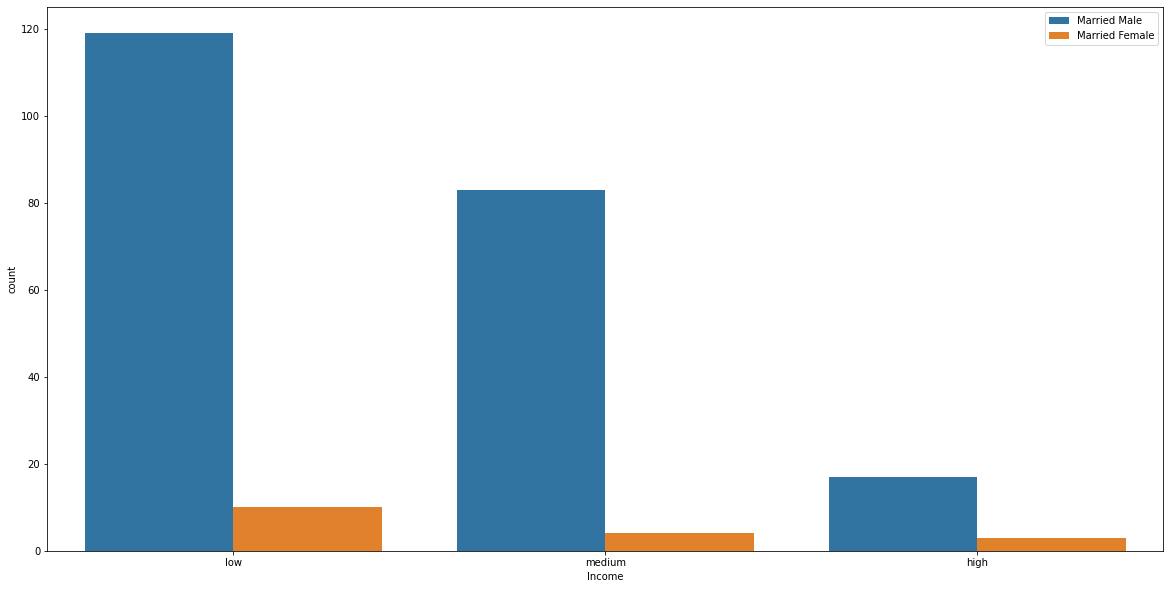

In [56]:
#5.1.Create a bar chart that shows the difference in application approvals for Married Men vs Married Women based on 
#income ranges.

sql_query ="select Gender, Married, Income, Application_Status from cdw_sapp_loan_application WHERE Married='Yes' and Application_Status='Y'"

db_con = get_db_connection()
cursor = db_con.cursor()  
cursor.execute(sql_query,)

dataset = pd.DataFrame(cursor.fetchall(), columns = ['Gender', 'Married','Income', 'Application_Status'])
dataset.head()
plt.figure(figsize = (20,10))
sb.countplot(x='Income', data=dataset, hue="Gender")
plt.legend(labels = ["Married Male", "Married Female"])

     Gender  Income Married
0      Male  medium      No
1      Male  medium     Yes
2      Male     low     Yes
3      Male     low     Yes
4      Male  medium      No
..      ...     ...     ...
506  Female     low      No
507    Male  medium     Yes
508    Male  medium     Yes
509    Male  medium     Yes
510  Female  medium      No

[511 rows x 3 columns]


C:\Users\sudaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sudaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sudaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


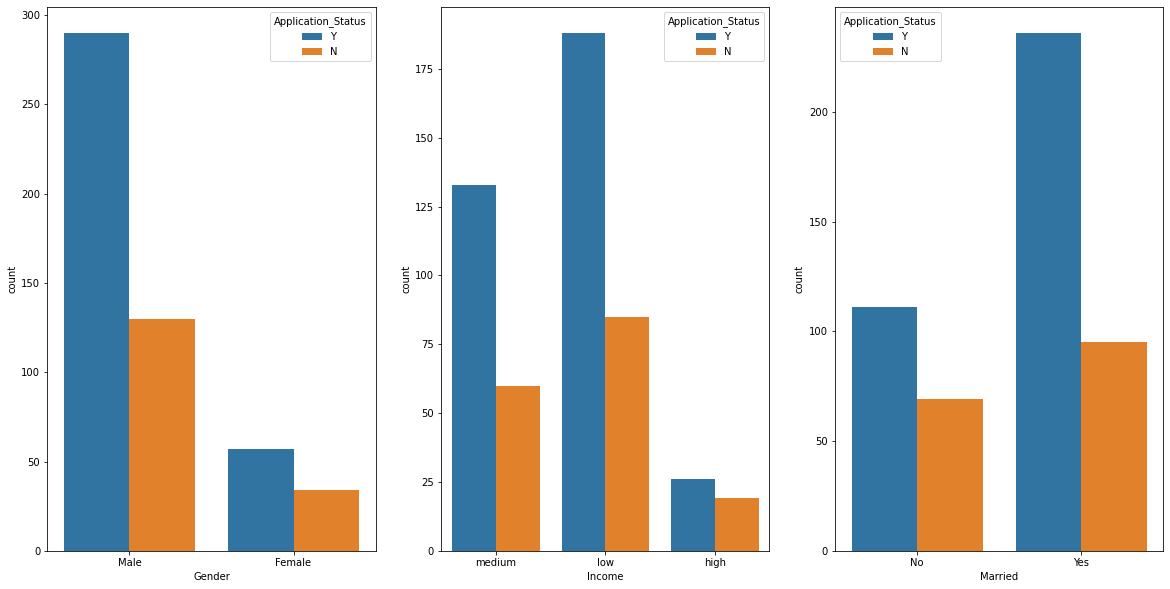

In [41]:
#5.1.Create a bar chart that shows the difference in application approvals for Married Men vs Married Women based on 
#income ranges.

sql = "SELECT Gender, Income, Married FROM cdw_sapp_loan_application"
       
db_con = get_db_connection()
cursor = db_con.cursor()
     
cursor.execute(sql,)

data2=pd.DataFrame(cursor.fetchall(), columns = ["Gender","Income","Married"])
print(data2)    

plt.figure(figsize = (20,10))
for i in enumerate(data2):
    plt.subplot(1,3,i[0]+1)
    sb.countplot(i[1], hue = 'Application_Status', data = dataset_full)

Text(0.5, 1.0, 'APPROVALS BASED ON PROPERTY AREA')

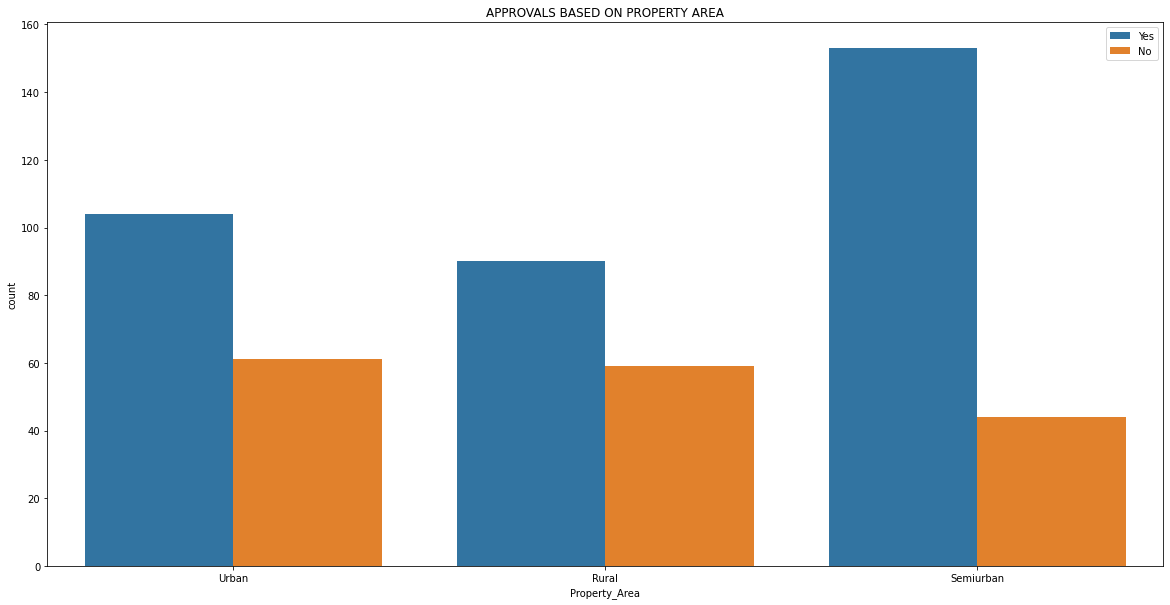

In [37]:
#5.2.Create and plot a chart that shows the difference in application approvals based on Property Area. 
sql_query ="select Application_Status, Property_Area from cdw_sapp_loan_application"

db_con = get_db_connection()
cursor = db_con.cursor()  
cursor.execute(sql_query,)
#dataset = pd.DataFrame(cursor.fetchall(), columns = ['Application_ID','Application_Status','Credit_History','Dependents','Education','Gender','Income','Married','Property_Area','Self_Employed'])
dataset52 = pd.DataFrame(cursor.fetchall(), columns = ['Application_Status', 'Property_Area'])
dataset52.head()
plt.figure(figsize = (20,10))
sb.countplot(x='Property_Area', data=dataset52, hue="Application_Status")
plt.legend(labels = ["Yes", "No"])
plt.title('APPROVALS BASED ON PROPERTY AREA')